## Домашнее задание № 2. Torch. Перцептрон, линейная регрессия.

In [1]:
import pandas as pd
import torch
import numpy as np
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from pylab import rcParams
# Для последующего сравнения моделей
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('C:/Users/Игорь/Downloads/boston-house-prices/housing.csv', header=None, delimiter=r"\s+", names=column_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
features = np.array(data.iloc[:,:13]).astype('float32')
labels = np.array (data.iloc[:,13]).astype('float32')

In [6]:
reg = LinearRegression().fit(features, labels)

In [7]:
reg.score(features, labels)

0.7406426558680462

In [8]:
reg.coef_

array([-1.08011946e-01,  4.64196503e-02,  2.05591451e-02,  2.68669748e+00,
       -1.77667084e+01,  3.80986023e+00,  6.95329974e-04, -1.47556639e+00,
        3.06048065e-01, -1.23347277e-02, -9.52748001e-01,  9.31191351e-03,
       -5.24758339e-01], dtype=float32)

In [9]:
reg.intercept_

36.45937

In [10]:
y_pred = reg.predict(features)

In [11]:
mean_squared_error(labels,y_pred)

21.894833

In [12]:
# для сходимости процесса,чтобы веса не становились очень большими 
sc = StandardScaler()
features = sc.fit_transform(features)

In [13]:
features = torch.tensor(features)
labels = torch.tensor(labels)

In [14]:
features.shape

torch.Size([506, 13])

In [15]:
labels.shape

torch.Size([506])

In [16]:
batch_size = 20
dataset = TensorDataset(features, labels)
# Randomly reading mini-batches
data_iter = DataLoader(dataset, batch_size, shuffle=True)

In [17]:
features.shape

torch.Size([506, 13])

In [18]:
labels.shape

torch.Size([506])

In [19]:
model = torch.nn.Sequential(torch.nn.Linear(13, 1))

In [20]:
loss = torch.nn.MSELoss(reduction='mean')

In [21]:
trainer = torch.optim.SGD(model.parameters(), lr=0.001)

In [22]:
model[0].weight.data = torch.randn(13).reshape((1, 13))
model[0].bias.data = torch.randn(1)

In [23]:
model[0].weight.data

tensor([[-0.1177, -0.7004,  0.7444, -0.1225, -1.2398, -0.7158, -0.8449, -0.1121,
          0.6648, -0.5186,  0.4235,  0.4018, -2.4592]])

In [24]:
num_epochs = 100
min_loss = 10000
for epoch in range(1, num_epochs + 1):
    for X, y in data_iter:
        trainer.zero_grad()
        l = loss(model.forward(X).reshape(-1), y)
        l.backward()
        trainer.step()
    l = loss(model.forward(features).reshape(-1), labels)
    if l.item() < min_loss:
        min_loss = l.item()
        best_coeff = model[0].weight.data
        best_bias = model[0].bias.data
    print('epoch %d, loss: %f' % (epoch, l.item()))
    print('w', model[0].weight.data)
    print('b', model[0].bias.data)

epoch 1, loss: 495.745697
w tensor([[-0.2235, -0.5704,  0.6059, -0.0244, -1.3204, -0.4398, -0.8993, -0.0790,
          0.5655, -0.6464,  0.1904,  0.4807, -2.6690]])
b tensor([1.5721])
epoch 2, loss: 444.339600
w tensor([[-0.3078, -0.4538,  0.4769,  0.0438, -1.3772, -0.1414, -0.9431, -0.0774,
          0.4923, -0.7549, -0.0431,  0.5474, -2.8624]])
b tensor([2.6471])
epoch 3, loss: 400.833893
w tensor([[-0.3462, -0.3597,  0.4230,  0.1455, -1.3805,  0.0810, -0.9403, -0.1151,
          0.4767, -0.7926, -0.2070,  0.5686, -2.9849]])
b tensor([3.6607])
epoch 4, loss: 362.790192
w tensor([[-0.3778, -0.3116,  0.3826,  0.2050, -1.3737,  0.2654, -0.9192, -0.1657,
          0.4760, -0.8220, -0.3286,  0.5830, -3.0818]])
b tensor([4.6162])
epoch 5, loss: 328.388550
w tensor([[-0.4058, -0.2400,  0.3438,  0.2587, -1.3736,  0.4480, -0.9113, -0.2077,
          0.4820, -0.8423, -0.4586,  0.5965, -3.1779]])
b tensor([5.5272])
epoch 6, loss: 297.758362
w tensor([[-0.4250, -0.2047,  0.3135,  0.3088, -1.3534

b tensor([20.3137])
epoch 45, loss: 27.401821
w tensor([[-0.5260,  0.3682,  0.1232,  0.8374, -1.1045,  2.6950, -0.1614, -1.6680,
          1.0422, -0.8587, -1.8626,  0.7646, -3.9529]])
b tensor([20.4282])
epoch 46, loss: 26.929735
w tensor([[-0.5273,  0.3726,  0.1202,  0.8345, -1.1083,  2.7023, -0.1500, -1.6863,
          1.0524, -0.8594, -1.8671,  0.7644, -3.9457]])
b tensor([20.5363])
epoch 47, loss: 26.524513
w tensor([[-0.5286,  0.3805,  0.1164,  0.8315, -1.1121,  2.7120, -0.1443, -1.7033,
          1.0626, -0.8598, -1.8725,  0.7658, -3.9448]])
b tensor([20.6336])
epoch 48, loss: 26.155403
w tensor([[-0.5302,  0.3882,  0.1134,  0.8247, -1.1187,  2.7155, -0.1376, -1.7192,
          1.0669, -0.8640, -1.8853,  0.7688, -3.9430]])
b tensor([20.7272])
epoch 49, loss: 25.792166
w tensor([[-0.5352,  0.3921,  0.1031,  0.8203, -1.1263,  2.7381, -0.1338, -1.7360,
          1.0718, -0.8723, -1.8913,  0.7737, -3.9491]])
b tensor([20.8234])
epoch 50, loss: 25.478859
w tensor([[-0.5335,  0.3958, 

          1.3565, -0.9606, -1.9819,  0.8298, -3.8785]])
b tensor([22.3109])
epoch 89, loss: 22.424376
w tensor([[-0.6236,  0.6141, -0.0116,  0.7392, -1.3497,  2.8069, -0.0207, -2.2101,
          1.3599, -0.9654, -1.9854,  0.8306, -3.8778]])
b tensor([22.3199])
epoch 90, loss: 22.411213
w tensor([[-0.6255,  0.6137, -0.0040,  0.7367, -1.3512,  2.7869, -0.0098, -2.2288,
          1.3761, -0.9577, -1.9836,  0.8239, -3.8897]])
b tensor([22.3390])
epoch 91, loss: 22.399532
w tensor([[-0.6349,  0.6208, -0.0124,  0.7361, -1.3632,  2.7989, -0.0177, -2.2277,
          1.3759, -0.9666, -1.9860,  0.8272, -3.8968]])
b tensor([22.3491])
epoch 92, loss: 22.389463
w tensor([[-0.6345,  0.6173, -0.0047,  0.7343, -1.3610,  2.7879, -0.0058, -2.2480,
          1.3948, -0.9566, -1.9792,  0.8273, -3.9011]])
b tensor([22.3637])
epoch 93, loss: 22.379290
w tensor([[-0.6371,  0.6196, -0.0085,  0.7340, -1.3662,  2.7908, -0.0056, -2.2571,
          1.3997, -0.9606, -1.9802,  0.8266, -3.8988]])
b tensor([22.3729])

In [25]:
print(f'best coeffs {best_coeff}')
print(f'best intercept {best_bias}')
print(f'loss minimum {min_loss}')

best coeffs tensor([[-6.6088e-01,  6.6379e-01, -2.9887e-02,  7.2993e-01, -1.4145e+00,
          2.7955e+00,  5.4778e-04, -2.3053e+00,  1.4287e+00, -9.9234e-01,
         -1.9954e+00,  8.5027e-01, -3.9029e+00]])
best intercept tensor([22.4191])
loss minimum 22.31954002380371


In [26]:
best_coeff.shape

torch.Size([1, 13])

In [27]:
features.shape

torch.Size([506, 13])

In [28]:
y_pred_perceptron = torch.mm(features,best_coeff.T) + best_bias

Text(0.5, 1.0, 'сравнение результатов')

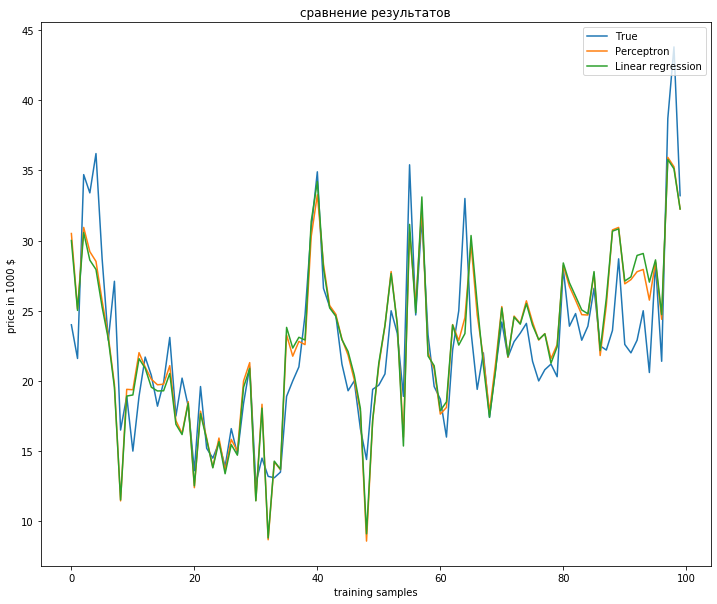

In [32]:
rcParams['figure.figsize'] = 12,10
plt.plot(labels.numpy()[:100])
plt.plot(y_pred_perceptron.numpy()[:100])
plt.plot(y_pred[:100])
#plt.tick_params(axis='x', which='both', bottom=False, top=False,labelbottom=False)
plt.ylabel('price in 1000 $')
plt.xlabel('training samples')
plt.legend(('True','Perceptron','Linear regression'), loc='upper right')
plt.title('сравнение результатов')